# Predicción del Comportamiento del Usuario con Redes Neuronales Artificiales

Este código utiliza un modelo de Red Neuronal Artificial (ANN) para predecir el comportamiento del usuario en función de varios aspectos de su interacción con el dispositivo.

## Descripción del Proyecto
Se utiliza una ANN secuencial de tipo clasificador para predecir la clase de comportamiento del usuario. Para ello, el código analiza y modela un conjunto de datos llamado `"user_behavior_dataset.csv"`, que contiene información como tiempo en pantalla, aplicaciones instaladas, consumo de batería, y más.

## Pasos Principales

### 1. Carga de Datos y Preprocesamiento
- Importa las bibliotecas necesarias para el análisis y modelado.
- Carga el conjunto de datos desde el archivo `"user_behavior_dataset.csv"` en un DataFrame de Pandas.
- Realiza una limpieza y transformación de los datos:
  - Elimina la columna `User ID`, no relevante para el análisis.
  - Convierte las variables categóricas (`género`, `modelo del dispositivo`, `sistema operativo`) a numéricas usando **Label Encoding**.
  - Elimina columnas menos relevantes (tiempo de pantalla, edad, género, aplicaciones instaladas, consumo de batería).
  - Escala las variables numéricas con **MinMaxScaler** para normalizar sus rangos.

### 2. Análisis Exploratorio de Datos
- Usa `df.info()` y `df.describe()` para obtener una visión general de los datos.
- Genera un mapa de calor de correlación para visualizar relaciones entre variables.
- Muestra histogramas para observar la distribución de las variables.

### 3. Preparación de Datos para el Modelo
- Divide los datos en conjuntos de entrenamiento (`X_train`, `y_train`) y prueba (`X_test`, `y_test`).
- Aplica **one-hot encoding** a la variable objetivo (`User Behavior Class`) para adecuarla al formato del modelo.

### 4. Creación y Entrenamiento del Modelo
- Crea un modelo de red neuronal artificial (ANN) utilizando Keras.
  - Arquitectura del modelo:
    - Capa de entrada: 6 neuronas.
    - Capa oculta: 4 neuronas.
    - Capa de salida: 5 neuronas (una para cada clase de comportamiento).
- Entrena el modelo con los datos de entrenamiento (`X_train`, `y_train`), usando el optimizador `"adam"` y la función de pérdida `"categorical_crossentropy"`.
- Evalúa el rendimiento del modelo durante el entrenamiento con los datos de prueba (`X_test`, `y_test`).

### 5. Evaluación del Modelo
- Visualiza la pérdida y la precisión del modelo durante el entrenamiento para analizar su evolución.

Este código predice la clase de comportamiento de un usuario utilizando un modelo de red neuronal que se entrena con características de interacción del usuario con su dispositivo. La estructura del modelo y el preprocesamiento adecuado permiten una clasificación precisa de los patrones de comportamiento.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler from the necessary module
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datos/user_behavior_dataset.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [ ]:
df = df.drop("User ID", axis=1)

In [ ]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Device Model"] = le.fit_transform(df["Device Model"])
df["Operating System"] = le.fit_transform(df["Operating System"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    int64  
 1   Operating System            700 non-null    int64  
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    int64  
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.8 KB


<Axes: >

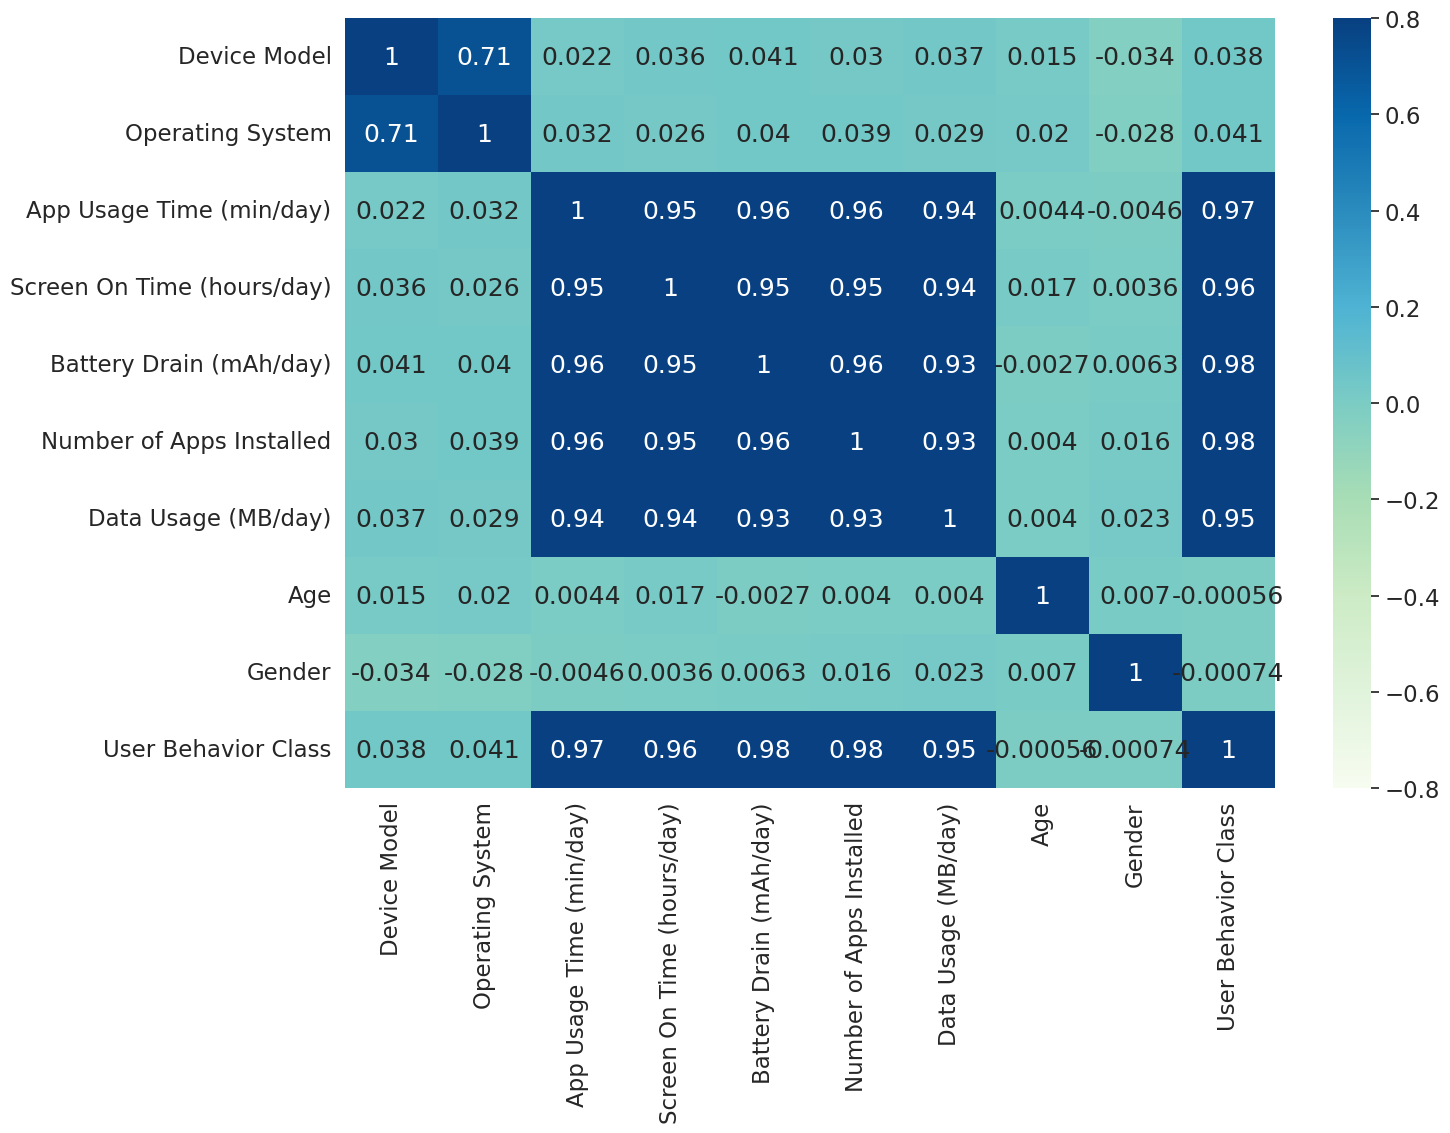

In [ ]:
sns.set(style = "whitegrid", font_scale =1.5)
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = "GnBu", vmin=-0.8, vmax=0.8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    int64  
 1   Operating System            700 non-null    int64  
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    int64  
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.8 KB


In [ ]:
df = df.drop("Screen On Time (hours/day)", axis = 1)
df = df.drop("Age", axis = 1)
df = df.drop("Gender",axis = 1)
df = df.drop("Number of Apps Installed", axis = 1)
df = df.drop("Battery Drain (mAh/day)", axis = 1)

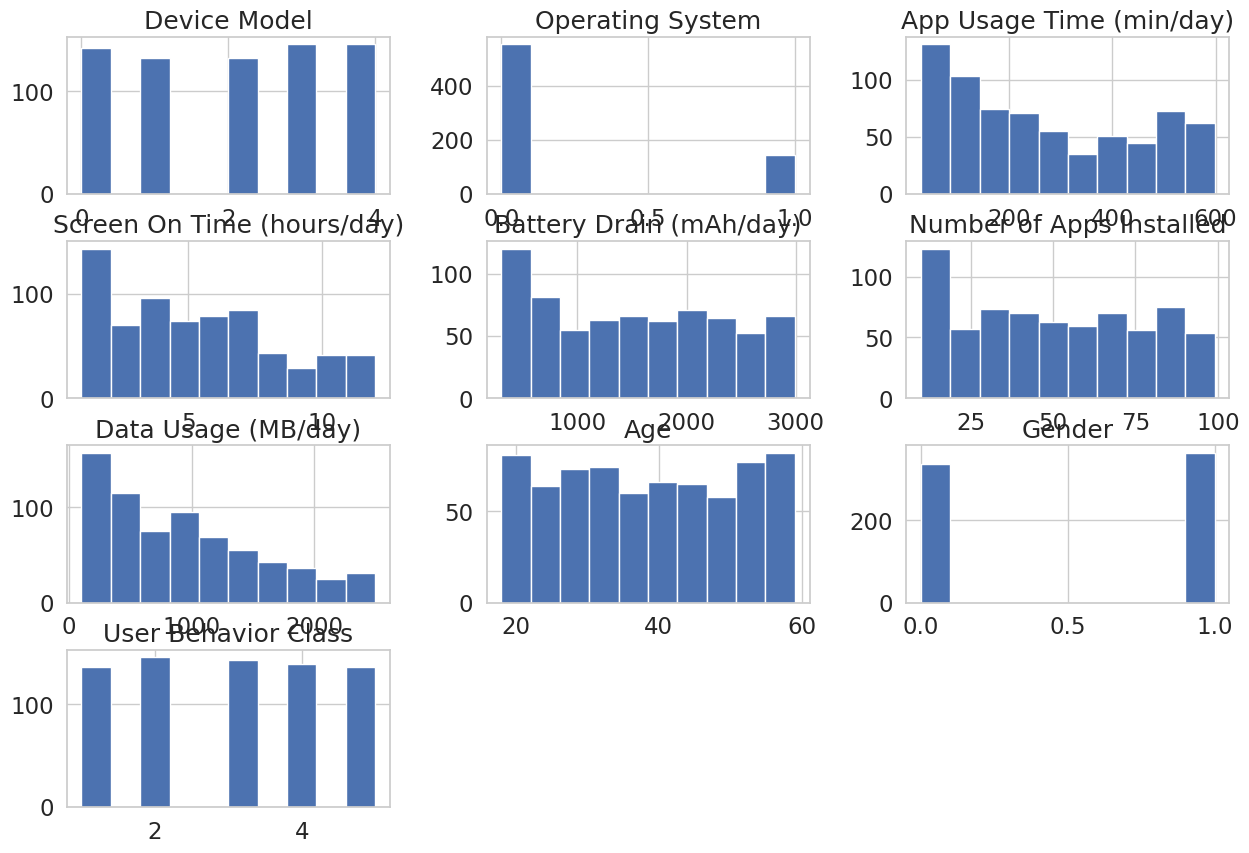

In [ ]:
df.hist(figsize = (15,10))
plt.show()

In [ ]:
X = df.drop("User Behavior Class", axis = 1)
y = df["User Behavior Class"]

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = pd.get_dummies(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
X

array([[0.        , 0.        , 0.63908451, ..., 0.42588727, 0.53658537,
        1.        ],
       [0.25      , 0.        , 0.41901408, ..., 0.35156576, 0.70731707,
        0.        ],
       [0.75      , 0.        , 0.21830986, ..., 0.09185804, 0.58536585,
        1.        ],
       ...,
       [0.        , 0.        , 0.12147887, ..., 0.14822547, 0.7804878 ,
        0.        ],
       [0.5       , 0.        , 0.05633803, ..., 0.05093946, 0.63414634,
        1.        ],
       [0.25      , 0.        , 0.32042254, ..., 0.30313152, 0.12195122,
        0.        ]])

In [ ]:
ann = Sequential()
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=4, activation='relu'))
ann.add(Dense(units=5, activation='softmax'))
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=5, epochs=100)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2260 - loss: 1.6489 - val_accuracy: 0.2619 - val_loss: 1.6127
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2816 - loss: 1.5960 - val_accuracy: 0.3190 - val_loss: 1.5746
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3160 - loss: 1.5342 - val_accuracy: 0.3143 - val_loss: 1.5087
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3530 - loss: 1.4710 - val_accuracy: 0.3571 - val_loss: 1.4182
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3538 - loss: 1.3473 - val_accuracy: 0.3952 - val_loss: 1.3199
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3928 - loss: 1.2622 - val_accuracy: 0.3952 - val_loss: 1.2301
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4182 - loss: 1.1682 - val_accuracy: 0.4429 - val_loss: 1.1484
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4489 - loss: 1.0638 - val_accuracy: 0.5000 - v

In [ ]:
y

,1,2,3,4,5
0,False,False,False,True,False
1,False,False,True,False,False
2,False,True,False,False,False
3,False,False,True,False,False
4,False,False,True,False,False
...,...,...,...,...,...
695,False,True,False,False,False
696,False,False,False,True,False
697,False,True,False,False,False
698,True,False,False,False,False


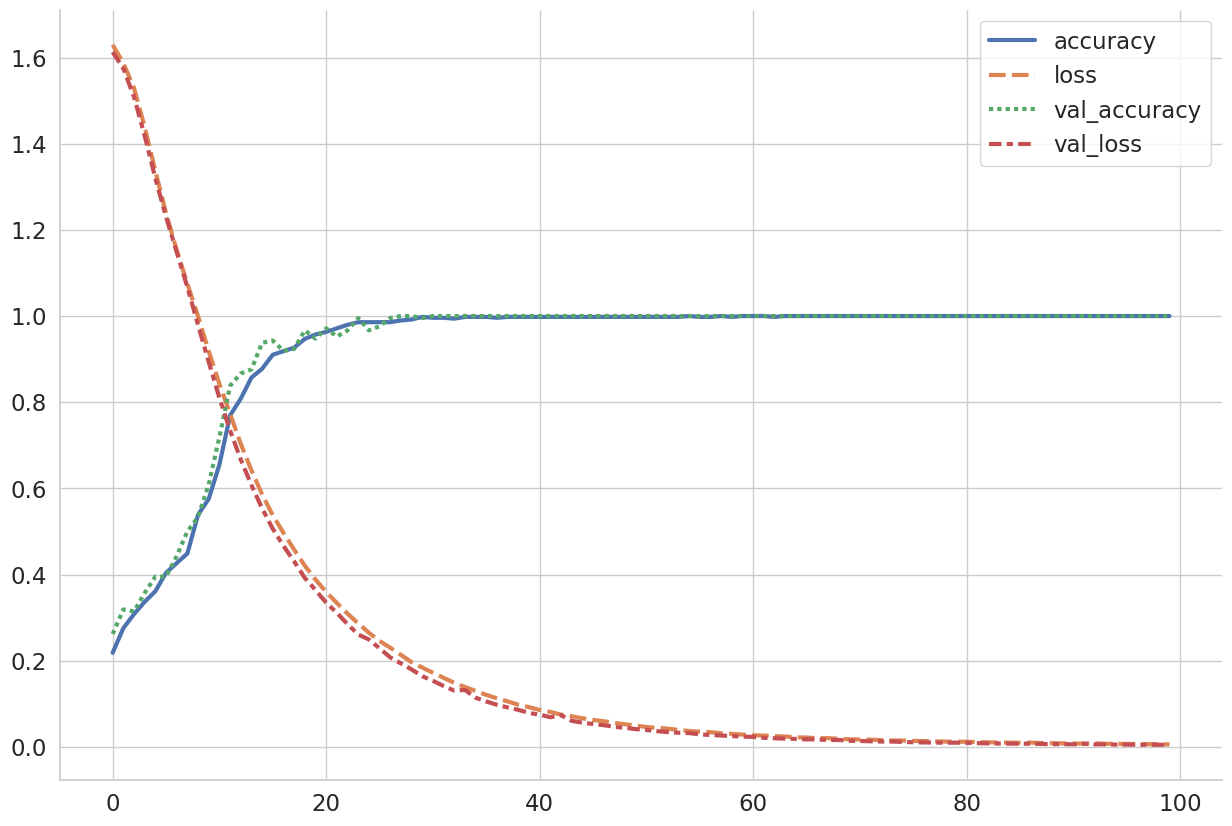

In [ ]:
loss = pd.DataFrame(ann.history.history)
plt.figure(figsize=(15, 10))
sns.lineplot(data=loss, lw=3)
sns.despine()